The project is using the ImageDataGenerator class from keras.preprocessing.image to load and preprocess images for training the model. It is using the Sequential and Model classes from keras.models to define the structure of the model, and various layers from keras.layers (such as Conv2D and Dense) to build the model. It is also using the Adam optimizer from keras.optimizers to train the model and the categorical_crossentropy loss function from keras.metrics to measure the model's performance. Finally, it is using the confusion_matrix function from sklearn.metrics to evaluate the model's performance on a test set.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import glob
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

- You can access the dataset from: https://www.kaggle.com/c/dogs-vs-cats/data
- download the test.zip

- If you dont have any of the above libraries, then you can just run the command: pip install library_name

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
# os.chdir("drive/")
os.getcwd()

'/content'

In [4]:
train_path = '/content/drive/MyDrive/cats vs dogs/train'
valid_path = '/content/drive/MyDrive/cats vs dogs/valid'
test_path = '/content/drive/MyDrive/cats vs dogs/test'

In [5]:
# tf.keras.applications.vgg16.preprocess_input [c1, c2, c3 .......c1000] , c1 = 0.1, c2 = .02, c3 = 0.66 ...
# or
# tf.keras.applications.mobilenet.preprocess_input
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [7]:
imgs, labels = next(train_batches)

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

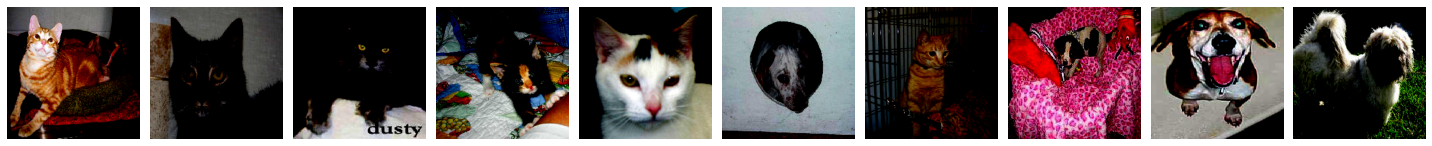

In [9]:
plotImages(imgs)
# the images have their colors distorted as they have been preprocessed 
# so that they can be used for more smooth training.

In [10]:
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [11]:
model_own = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)), # 3 is for rgb color configuration
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'), # since ther are only two classes cats and dogs.
])


In [12]:
model_own.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# if the above code gives error, then you can use binary_crossentropy.


In [13]:
model_own.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)


Epoch 1/20
100/100 - 12s - loss: 0.7678 - accuracy: 0.5520 - val_loss: 0.6399 - val_accuracy: 0.6250 - 12s/epoch - 119ms/step
Epoch 2/20
100/100 - 7s - loss: 0.5900 - accuracy: 0.6710 - val_loss: 0.6050 - val_accuracy: 0.6850 - 7s/epoch - 74ms/step
Epoch 3/20
100/100 - 5s - loss: 0.4982 - accuracy: 0.7450 - val_loss: 0.5928 - val_accuracy: 0.6750 - 5s/epoch - 55ms/step
Epoch 4/20
100/100 - 6s - loss: 0.3942 - accuracy: 0.8550 - val_loss: 0.6684 - val_accuracy: 0.6100 - 6s/epoch - 55ms/step
Epoch 5/20
100/100 - 5s - loss: 0.3111 - accuracy: 0.8920 - val_loss: 0.6031 - val_accuracy: 0.6750 - 5s/epoch - 55ms/step
Epoch 6/20
100/100 - 6s - loss: 0.2590 - accuracy: 0.9250 - val_loss: 0.6239 - val_accuracy: 0.6700 - 6s/epoch - 55ms/step
Epoch 7/20
100/100 - 6s - loss: 0.1876 - accuracy: 0.9680 - val_loss: 0.6412 - val_accuracy: 0.6750 - 6s/epoch - 56ms/step
Epoch 8/20
100/100 - 5s - loss: 0.1434 - accuracy: 0.9800 - val_loss: 0.6437 - val_accuracy: 0.6800 - 5s/epoch - 55ms/step
Epoch 9/20
10

In [14]:
# Download model - Internet connection needed for the first time
mobile_new = tf.keras.applications.mobilenet.MobileNet()

In [15]:
mobile_new.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [16]:
# how to choose till when to take in the layer, you have to experiment
x = mobile_new.layers[-6].output
output = Dense(units=2, activation='softmax')(x) # 2 as we have two classes dogs and cats.
# We know that mobilenet and vgg16 both are functional model while we use Sequential model to create
# neural networks. Before we were iterating over all layers from vgg16 to a sequential model
# now we are directly using the model itself.

In [17]:
Models = Model(inputs=mobile_new.input, outputs=output)

In [18]:
for layer in Models.layers[:-23]: # there are 88 layers and want to only train the last 23 layers
    layer.trainable = False

In [19]:
Models.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [20]:
Models.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Models.fit(x=train_batches, validation_data=valid_batches, epochs=15, verbose=2)

In [22]:
prediction_new = Models.predict(x=test_batches, verbose=0)
prediction_new[0]

array([[[9.8905945e-01, 1.0940563e-02],
        [9.9412549e-01, 5.8744620e-03],
        [9.9935943e-01, 6.4053357e-04],
        [9.9634737e-01, 3.6526551e-03],
        [9.9999833e-01, 1.6866530e-06],
        [9.9748778e-01, 2.5121493e-03],
        [5.8280027e-01, 4.1719970e-01]],

       [[9.9865329e-01, 1.3466900e-03],
        [9.9419540e-01, 5.8046007e-03],
        [9.9998605e-01, 1.3985201e-05],
        [9.9816614e-01, 1.8338304e-03],
        [1.0000000e+00, 5.7699992e-08],
        [9.9981123e-01, 1.8882484e-04],
        [6.6395509e-01, 3.3604494e-01]],

       [[9.8064524e-01, 1.9354744e-02],
        [9.9936885e-01, 6.3119357e-04],
        [9.9994552e-01, 5.4523938e-05],
        [8.2499951e-01, 1.7500056e-01],
        [9.9957794e-01, 4.2200289e-04],
        [9.9908543e-01, 9.1452530e-04],
        [9.6054977e-01, 3.9450273e-02]],

       [[8.1858963e-01, 1.8141037e-01],
        [9.9899238e-01, 1.0075675e-03],
        [5.4137564e-01, 4.5862439e-01],
        [2.2227164e-01, 7.7772838e

- Since the value at 0th index is closer to 1 that means our model predicted cat as the class of the image.

In [24]:
Models.save("MyDrive/Dataset/Models/cats_dogs_classifier.h5")